![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

Asignatura: Introducción a Data Science

Profesor: Juan Bekios Calfa

---


#Laboratorio Número 4: Regresión Lineal

**Integrantes del Grupo:**

* *Nombre y apellido integrante 1*
* *Nombre y apellido integrante 2*

**Objetivo:** 


*   Analizar los datos entregados para el laboratorio.
*   Calcular una regresión lineal utilizando el método analítico.
*   Calcular la regresión lineal utilizando el método de descenso del gradiente.
*   Comparar los resultados.


## Analizar los datos entregados para el laboratorio

### Cargar los datos

En el ejemplo se hace una carga utilizando *Google Drive*:

1.   Hacer click en la pestaña **Files** del panel de la izquierdo.
2.   Hacer click en ***Mount Drive***.
3.   Ir a la url indicada en *Go to this URL in a browser*.
4.   Copiar código de acceso y agregarlo a *Enter your authorization code*.
5.   Establecer la conexión con Pandas.

También se puede subir el archivo utilizando la opción *Upload* del panel izquierdo.





In [1]:
#Conectarnos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Cargar los datos utilizando pandas

In [2]:
import pandas as pd

df_terremoto = pd.read_csv('/content/drive/My Drive/D-UCN/Classes/IntroDataScience/2019-2/Laboratorios/L05.1-Regresion Lineal/1366.dat', sep='\t', names=['x', 'y'])
df_terremoto.head()

,x,y
0,5.5,6.0
1,5.0,5.2
2,5.5,5.7
3,5.0,4.9
4,5.9,5.8


###Graficar los datos tal como vienen en el archivo

Se grafican los datos sin ser normalizados. Se recomienda normalizar los datos para que los clasificadores se condicionen mejor.

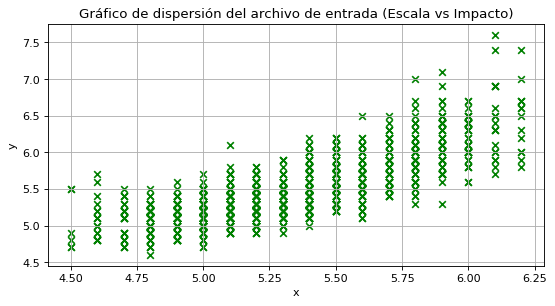

In [20]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_terremoto['x'], df_terremoto['y'], marker='x', color='g')

plt.title('Gráfico de dispersión del archivo de entrada (Escala vs Impacto)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

### Normalizar los datos

**Pregunta para el grupo:** ¿Que efecto produce la normalización dada por def norm_data(df) sobre los datos entregados en el archivo?. Describa brevemente la salida esperada de los datos normalizados.

**Respuesta del grupo**:

...

...

...

In [26]:
def norm_data(df):
  x = df['x'].values
  y = df['y'].values
  x_nor = (x - min(x))/(max(x) - min(x))
  y_nor = (y - min(y))/(max(y) - min(y))
  data = {'x': x_nor, 'y': y_nor}
  df_new = pd.DataFrame(data=data)
  return df_new

### Graficar los datos normalizados

Implemente un código en Python que grafique los datos normalizados.

In [ ]:
# -- agregar código --
# -- agregar código --
# -- agregar código --

plt.xlabel('x normalizado')
plt.ylabel("y normalizado")

**Pregunta para el grupo:** ¿Qué sucede al normalizar los datos?,¿Se pierde información?

**Respuesta del grupo**:

...

...

...

**Pregunta para el grupo:** Implemente la normalización de los datos utilizando las librerías [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler). ¿Entrega los mismos resultados?

**Respuesta del grupo**:

...

...

...

**Pregunta para el grupo:** Implemente la normalización de los datos utilizando las librerías [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) utilizando el método **StandardScaler**.

**Respuesta del grupo**:

...

...

...



## Regresión Lineal Analítica

Ajustar la mejor función lineal utilizando el método analítico.

In [33]:
import numpy as np

def analytic_ls(X, y):
  m, n = X.shape
  A = np.zeros((n, n))
  b = np.zeros(n)
  for i in range(m):
    A += np.outer(X[i], X[i])
    b += X[i] * y[i]
  return np.linalg.solve(A, b)

In [36]:
import numpy as np

df_nor = norm_data(df_terremoto)
X = np.array([df_nor['x'].astype('float'), np.ones(len(df_nor))]).T
y = df_nor['y'].values.copy()

theta = analytic_ls(X, y)
print(theta)

[0.51916261 0.04048403]


**Pregunta para el grupo:** Explicar brevemente el método analítico.

**Respuesta del grupo**:

...

...

...

**Pregunta para el grupo:** Explique como funciona el código implementado en def analytic_ls(X, y). ¿Qué es la matriz A y la matriz b?

**Respuesta del grupo**:

...

...

...

#### Graficar resultados regresión

Para graficar la recta obtenida por la regresión lineal se estima los valores estimados de **y** a partir de los parámetros encontrados en el punto anterior. Como los datos están normalizados sabemos que el número mínimo de **x** es cero y el número máximo es uno.

In [39]:
def y_estimada(x, theta1, bias):
  return theta1*x + bias

y_estimado1 = y_estimada(0,0.51916261, 0.04048403)
print(y_estimado1)

y_estimado2 = y_estimada(5.5,0.51916261, 0.04048403)
print(y_estimado2)


0.04048403
2.8958783849999996


### Método sklearn

Utilizar la función implementada en sklearn para calcular la regresión lineal utilizando el método de mínimos cuadrados ([Sklearn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)).

**Pregunta para el grupo:** ¿Son comparables los resultados obtenidos por el método analítico vs el método de regresión lineal implementado por sklearn?

**Respuesta del grupo**:

...

...

...


In [ ]:
#Implementación utilizando sklearn para calcular la regresión lineal de mínimos cuadrados

# -- agregar código --
# -- agregar código --
# -- agregar código --

####Graficar resultados regresión

In [ ]:
# -- agregar código --
# -- agregar código --
# -- agregar código --

plt.title('Gráfico de recta de regresión lineal (sklearn)')
plt.xlabel('x normalizado')
plt.ylabel('y normalizado')

## Regresión Lineal por descenso de gradiente

Como se ha visto en clases, el descenso de gradiente se utiliza para encontrar los parámetros de la regresión lineal cuando la función de error (*loss*) es no convexa. 

El algoritmo para descenso de gradiente utilizando mínimos cuadrados es,


<hr/>

**Initialize:**
    
* $\theta := 0$ 

**Repeat until converged:**

* **For $j = 1,\ldots,n$:**

    * $\displaystyle \theta_j := \theta_j + \alpha\frac{2}{m} \sum_{i=1}^m \left (\sum_{k=1}^n \theta_k x^{(i)}_k - y^{(i)} \right ) x^{(i)}_j$

<hr/>

Y su implementación es python es la siguiente:

In [40]:
import numpy as np

x_nor = df_nor['x']
y_nor = df_nor['y']

def gradient_descent(iter=10):
  theta = np.array([0., 0.])
  alpha = 1.0
  for t in range(iters):
    theta[0] -= alpha/len(x_nor) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor) * x_nor)
    theta[1] -= alpha/len(x_nor) * 2 * sum((theta[0] * x_nor + theta[1] - y_nor))
  return theta

### Gráfico de dispersión vs regresión lineal 

El siguiente ejemplo muestra como graficar los puntos normalizados de los datos y la recta de regresión a partir de los parámetros calculados.

In [41]:
def plot_fit(theta):
    plt.scatter(x_nor, y_nor, marker = 'x')
    plt.xlabel("X normalizado")
    plt.ylabel("Y normalizado")
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
    plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
    plt.xlim(xlim)
    plt.ylim(ylim)

## Probar varias iteraciones (I)
Definir un número adecuado de iteraciones utilizando un programa.

**Pregunta para el grupo:** ¿Cual es el número adecuado de iteraciones para que el descendiente de gradiente funcione adecuadamente?. Pruebe con 1, 10, 100, 1000 y 10000 iteraciones.

**Respuesta del grupo**:

...

...

...

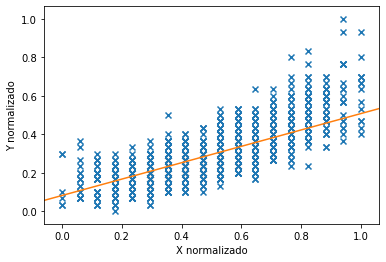

In [ ]:
plot_fit(gradient_descent(1))

In [ ]:
# Prueba con 10 iteraciones

# -- agregar código --

In [ ]:
# Prueba con 100 iteraciones

# -- agregar código --

In [ ]:
# Prueba con 1000 iteraciones

# -- agregar código --

In [ ]:
# Prueba con 10000 iteraciones

# -- agregar código --

**Pregunta para el grupo:** Para el mejor número de iteraciones. ¿Cuales son los valores de $\theta$?. ¿Son diferentes a los obtenidos con los otros métodos?

**Respuesta del grupo**:

...

...

...

## Probar varias iteraciones (II)

Calcular el número de iteraciones del descenso de gradiente automaticamente:

1.  Implemente un gráfico donde aparezca el número de iteraciones del algoritmo de descenso de gradiente vs la función de pérdida (función de error). 

**Pregunta para el grupo:** Observando el gráfico. ¿Puede determinar el número de iteraciones aproximada para lograr un óptimo?. Según su punto de vista, ¿cual sería el número de iteraciones aproximado para lograr ese óptimo?

**Respuesta del grupo**:

...

...

...

In [ ]:
# Gráfico número de iteraciones vs función de pérdida

# -- agregar código --
# -- agregar código --
# -- agregar código --

2.  Reescriba *gradient_descent()* para encontrar el mejor número de iteraciones automáticamente e imprima su resultado (número de iteración óptima y parámetros $\theta$.

In [ ]:
# Función para determinar los parámetros óptimos sin indicar número de iteraciones

import numpy as np

x_nor = df_nor['x']
y_nor = df_nor['y']

def gradient_descent():
    theta = np.array([0., 0.])
    # -- agregar código --
    # -- agregar código --
    # -- agregar código --
    return iteraciones, theta

**Pregunta para el grupo:** ¿Cuál  es el número de iteraciones óptima obtenida por el algoritmo propuesto y sus parámetros $\theta$?.

**Respuesta del grupo**:

...

...

...

**Pregunta para el grupo:** Utilizando los métodos de normalización definidos por sklearn (MinMaxScaler y StandardScaler) y los datos sin normalizar. ¿Puede observar una mejora en utilizar datos normalizados con respecto a los  no normalizados?. Explique detalladamente y cuantitativamente (métricas) si existe una mejora.

**Respuesta del grupo**:

...

...

...